In [11]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl = "en-US")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

 


In [163]:
n = int(input("Enter No. of KeyWords(Maximum 5) : "))
keywords_all = []
for n in range(n):
    key = input("Enter Keyword : ")
    keywords_all.append(key)
print("KeyWords_all : ", keywords_all)

KeyWords_all :  ['event manager']


In [43]:
cat = 0
timeframes = ['today 5-y', 'today 3-y', 'today 2-y', 'today 1-y', 'today 12-m', 'today 6-m', 'today 3-m', 'today 1-m', 'now 7-d']
gprop = ''
geo = ''

In [44]:
def check_trends(keyword):
    pytrends.build_payload(keyword, cat, timeframes[0], geo, gprop)
    data = pytrends.interest_over_time()
    return data

In [45]:
keywords=[]
for keyword in keywords_all:
    keywords.append(keyword)
    data = check_trends(keywords)
    keywords.pop()
    data.drop(['isPartial'], axis=1, inplace=True)
    data.to_csv('data.csv')
    


In [4]:
df = pd.read_csv('data.csv')
df.head()

,date,event manager
0,2017-02-05,65
1,2017-02-12,67
2,2017-02-19,75
3,2017-02-26,75
4,2017-03-05,78


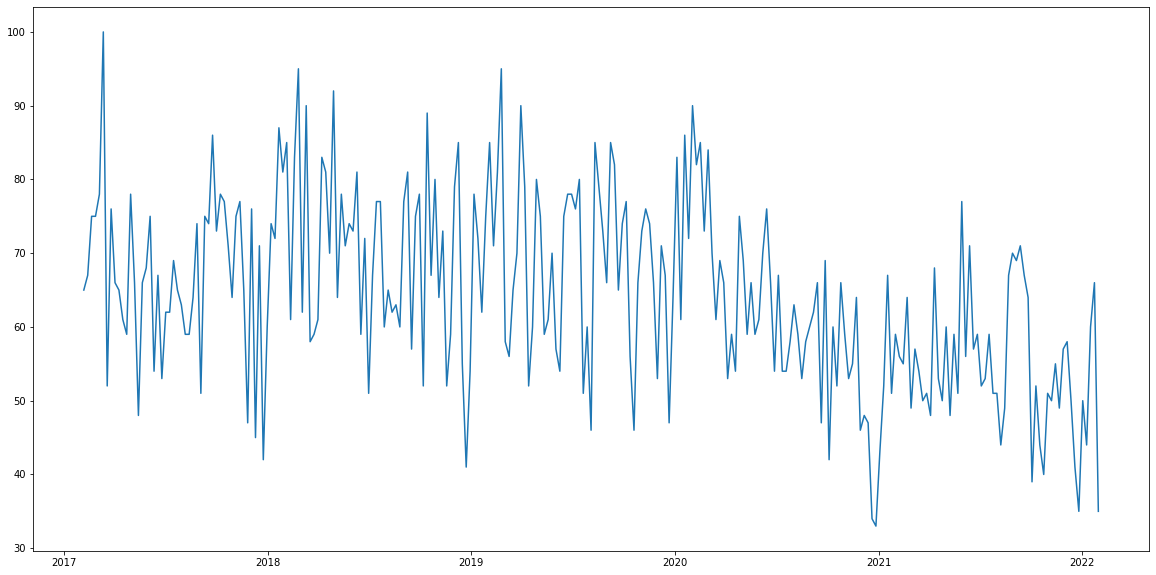

In [46]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df['date']

plt.figure(figsize=(20,10))
plt.plot(df[keywords_all[0]], label = 'Trends')

In [7]:
keywords_all = ['event manager']

In [8]:
data2 = df.sort_index(ascending = True, axis = 0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',keywords_all[0]])
for i in range(0,len(data2)):
    new_dataset['Date'][i]=data2['date'][i]
    new_dataset[keywords_all[0]][i]=data2[keywords_all[0]][i]

In [9]:
new_dataset.head()

,Date,event manager
0,2017-02-05,65
1,2017-02-12,67
2,2017-02-19,75
3,2017-02-26,75
4,2017-03-05,78


In [12]:
final_dataset = new_dataset.values

final = pd.DataFrame(final_dataset)

train_data, valid_data =  train_test_split(final, test_size=0.2)

In [13]:
train_data.head()

,0,1
41,2017-11-19,65
175,2020-06-14,76
105,2019-02-10,71
241,2021-09-19,67
217,2021-04-04,48


In [14]:
valid_data.head()

,0,1
153,2020-01-12,61
227,2021-06-13,71
240,2021-09-12,71
142,2019-10-27,66
176,2020-06-21,66


In [15]:
print("Leangth of Training Dataset : ", len(train_data))
print("Leangth of Testing Dataset : ", len(valid_data))


Leangth of Training Dataset :  208
Leangth of Testing Dataset :  53


In [95]:
splitter = len(train_data)

In [16]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [17]:


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]
for i in range(10,len(train_data)):
    x_train_data.append(scaled_data[i-10:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [25]:
x_train_data

array([[[0.47761194],
        [0.50746269],
        [0.62686567],
        ...,
        [0.64179104],
        [0.49253731],
        [0.47761194]],

       [[0.50746269],
        [0.62686567],
        [0.62686567],
        ...,
        [0.49253731],
        [0.47761194],
        [0.41791045]],

       [[0.62686567],
        [0.62686567],
        [0.67164179],
        ...,
        [0.47761194],
        [0.41791045],
        [0.3880597 ]],

       ...,

       [[0.3880597 ],
        [0.29850746],
        [0.32835821],
        ...,
        [0.01492537],
        [0.        ],
        [0.14925373]],

       [[0.29850746],
        [0.32835821],
        [0.46268657],
        ...,
        [0.        ],
        [0.14925373],
        [0.28358209]],

       [[0.32835821],
        [0.46268657],
        [0.19402985],
        ...,
        [0.14925373],
        [0.28358209],
        [0.50746269]]])

In [156]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=10,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=10))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-10:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=100,batch_size=1,verbose=2)

C:\Users\WebbWayne1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Epoch 1/100
197/197 - 10s - loss: 0.0505 - 10s/epoch - 53ms/step
Epoch 2/100
197/197 - 1s - loss: 0.0329 - 877ms/epoch - 4ms/step
Epoch 3/100
197/197 - 1s - loss: 0.0327 - 881ms/epoch - 4ms/step
Epoch 4/100
197/197 - 1s - loss: 0.0336 - 877ms/epoch - 4ms/step
Epoch 5/100
197/197 - 1s - loss: 0.0324 - 892ms/epoch - 5ms/step
Epoch 6/100
197/197 - 1s - loss: 0.0320 - 877ms/epoch - 4ms/step
Epoch 7/100
197/197 - 1s - loss: 0.0317 - 882ms/epoch - 4ms/step
Epoch 8/100
197/197 - 1s - loss: 0.0315 - 902ms/epoch - 5ms/step
Epoch 9/100
197/197 - 1s - loss: 0.0320 - 880ms/epoch - 4ms/step
Epoch 10/100
197/197 - 1s - loss: 0.0312 - 881ms/epoch - 4ms/step
Epoch 11/100
197/197 - 1s - loss: 0.0314 - 887ms/epoch - 5ms/step
Epoch 12/100
197/197 - 1s - loss: 0.0315 - 875ms/epoch - 4ms/step
Epoch 13/100
197/197 - 1s - loss: 0.0318 - 878ms/epoch - 4ms/step
Epoch 14/100
197/197 - 1s - loss: 0.0314 - 892ms/epoch - 5ms/step
Epoch 15/100
197/197 - 1s - loss: 0.0310 - 876ms/epoch - 4ms/step
Epoch 16/100
197/19

In [26]:
X_test=[]
for i in range(10,inputs_data.shape[0]):
    X_test.append(inputs_data[i-10:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_trends=lstm_model.predict(X_test)
predicted_trends=scaler.inverse_transform(predicted_trends)

NameError: name 'inputs_data' is not defined

C:\Users\WEBBWA~1\AppData\Local\Temp/ipykernel_14924/2888142126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


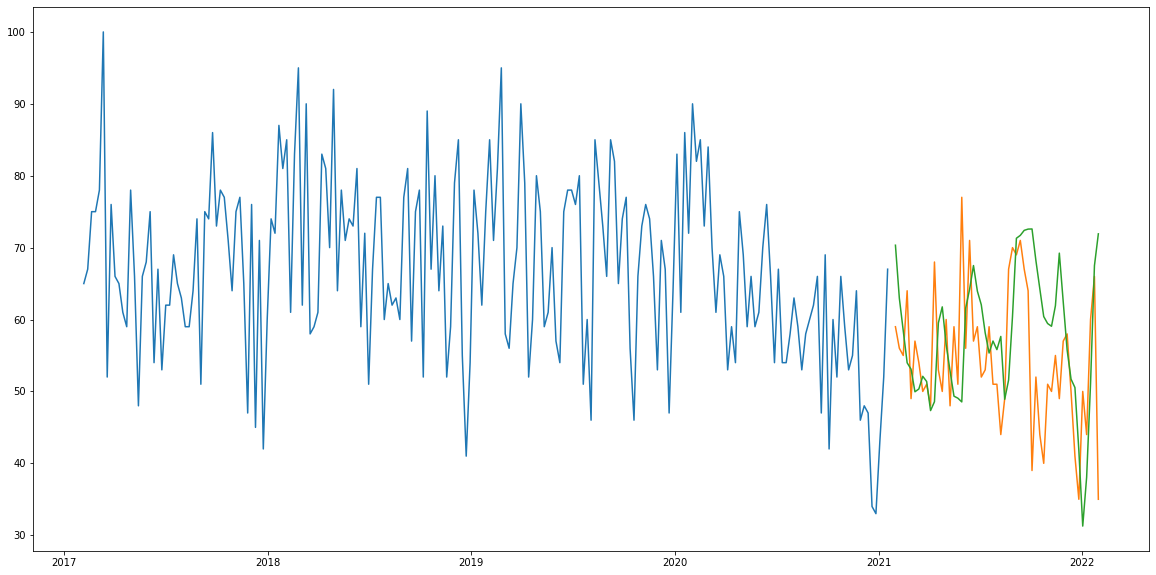

In [158]:
train_data=new_dataset[:splitter-1]
valid_data=new_dataset[splitter:]
valid_data['Predictions']=predicted_trends
plt.plot(train_data[keywords_all[0]])
plt.plot(valid_data[[keywords_all[0],"Predictions"]])